# Übungsblatt 9
## Präsenzaufgaben
### Aufgabe 1 &nbsp;&nbsp;&nbsp; Unifikation I

In [1]:
from nltk.featstruct import FeatStruct

Gegeben seien folgende Merkmalstrukturen:

In [2]:
f1 = FeatStruct(
    '[Vorname=Max, Nachname=Mustermann,' + 
    'Privat=[Strasse=Hauptstrasse, Ort=[Muenchen]]]'
)
f2 = FeatStruct(
    '[Arbeit=[Strasse="Oettingenstrasse", Ort=(1)["Muenchen"]],' +
    'Privat=[Ort->(1)]]')
f3 = FeatStruct(
    '[Strasse="Hauptstrasse"]'
)
f4 = FeatStruct(
    '[Privat=[Strasse="Hauptstrasse", Ort=["Passau"]]]'
)

Unifizieren Sie:
- f1 mit f2

In [3]:
print(f1.unify(f2).__repr__())

[Arbeit=[Ort=(1)['Muenchen'], Strasse='Oettingenstrasse'], Nachname='Mustermann', Privat=[Ort->(1), Strasse='Hauptstrasse'], Vorname='Max']


- f2 mit f4

In [4]:
print(f2.unify(f4).__repr__())

None


### Aufgabe 2 &nbsp;&nbsp;&nbsp; Typhierarchie im NLTK

Gegeben sei folgende Typhierarchie:

$$\bot \sqsubseteq \text{Genitiv}$$

$$\bot \sqsubseteq \text{nicht-Genitiv}$$

$$\text{nicht-Genitiv} \sqsubseteq \text{Nominativ-Akkusativ}$$

$$\text{nicht-Genitiv} \sqsubseteq \text{Dativ}$$

$$\text{Nominativ-Akkusativ} \sqsubseteq \text{Nominativ}$$

$$\text{Nominativ-Akkusativ} \sqsubseteq \text{Akkusativ}$$

Implementieren Sie mithilfe der Klasse `HierarchicalFeature`,
die Sie sich von der Kurs-Website herunterladen können, ein Feature `CASE`, das der vorgegebenen Typhierarchie entspricht.

Nutzen Sie dieses Feature dann, um Übergenerierung in folgender Grammatik zu vermeiden:

In [5]:
grammar = """
S -> NP[*CASE*=nom] VP
NP[*CASE*=?x] -> DET[*CASE*=?x,GEN=?y] NOM[*CASE*=?x,GEN=?y]
NOM[*CASE*=?x,GEN=?y] -> N[*CASE*=?x,GEN=?y] NP[*CASE*=gen]
NOM[*CASE*=?x,GEN=?y] -> N[*CASE*=?x,GEN=?y]
VP -> V

V -> "schläft"
DET[*CASE*=nomakk,GEN=fem] -> "die"
DET[*CASE*=nomakk,GEN=neut] -> "das"
DET[*CASE*=gen,GEN=mask] -> "des"
DET[*CASE*=gen,GEN=neut] -> "des"
DET[*CASE*=nom,GEN=mask] -> "der"
DET[*CASE*=gen,GEN=fem] -> "der"

N[*CASE*=nongen,GEN=mask] -> "Mann"
N[*CASE*=nongen,GEN=fem] -> "Frau"
N[*CASE*=nongen,GEN=neut] -> "Kind"
N[*CASE*=gen,GEN=fem] -> "Frau"
N[*CASE*=gen,GEN=mask] -> "Mannes"
N[*CASE*=gen,GEN=neut] -> "Kindes"
"""

In [6]:
from IPython.display import display
import nltk
from typed_features import HierarchicalFeature, TYPE

Hier muss die Typhierarchie in Form eines `Dictionary` definiert werden:

In [7]:
type_hierarchy = {
    "gen": [],
    "nongen": ["nomakk", "dat"],
    "nomakk": ["nom", "akk"],
    "nom": [],
    "dat": [],
    "akk": []
}

In [8]:
CASE = HierarchicalFeature("CASE", type_hierarchy)
compiled_grammar = nltk.grammar.FeatureGrammar.fromstring(
    grammar, features=(CASE, TYPE)
)
parser = nltk.FeatureEarleyChartParser(compiled_grammar)

Folgendes sollte funktionieren:

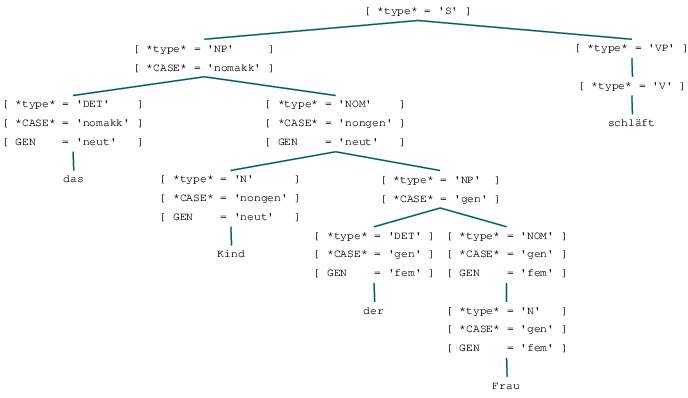

In [9]:
for t in parser.parse("das Kind der Frau schläft".split()):
    display(t)

Folgendes sollte leer sein:

In [10]:
list(parser.parse("des Mannes schläft".split()))

[]

Folgendes sollte wieder funktionieren. Betrachten Sie aufmerksam die Merkmale im Syntaxbaum.

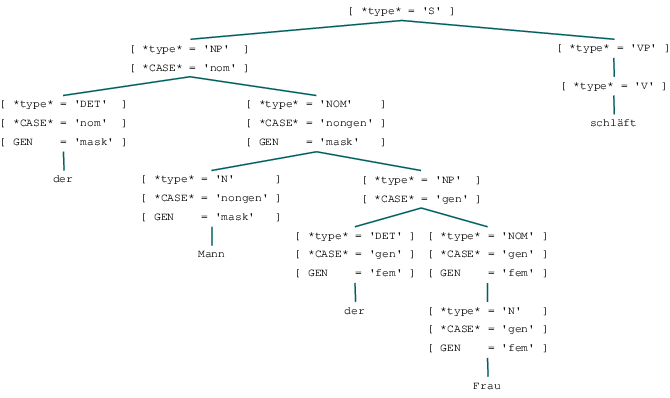

In [11]:
for t in parser.parse("der Mann der Frau schläft".split()):
    display(t)

## Hausaufgaben
### Aufgabe 3 &nbsp;&nbsp;&nbsp; Unifikation II
Es seien wieder die Merkmalstrukturen aus Aufgabe 1 gegeben.

Unifizieren Sie:
- f1 mit f4

In [ ]:
print(f1.unify(f4).__repr__())

- f2 mit f3

In [ ]:
print(f2.unify(f3).__repr__())

### Aufgabe 4 &nbsp;&nbsp;&nbsp; Weniger Redundanz dank besonderer Merkmale
Beseitigen Sie die Redundanz in den lexikalischen Regeln (Zeilen 8 - 32) der folgenden Grammatik durch eine Typhierarchie (wo dies nötig ist). Achten Sie darauf, die Menge der akzeptierten Sätze weder zu verkleinern noch zu vergrößern!

Anzugeben sind die neuen Grammatikregeln, sowie Ihre Typhierarchie (z. B. in graphischer Form).

In [ ]:
redundant_grammar = """
S -> NP[KAS=nom] VP

NP[KAS=?y] -> DET[GEN=?x,KAS=?y] NOM[GEN=?x,KAS=?y]
NOM[GEN=?x,KAS=?y] -> N[GEN=?x,KAS=?y] NP[KAS=gen]
NOM[GEN=?x,KAS=?y] -> N[GEN=?x,KAS=?y]

DET[GEN=mask,KAS=nom] -> "der"
DET[GEN=mask,KAS=gen] -> "des"
DET[GEN=mask,KAS=dat] -> "dem"
DET[GEN=mask,KAS=akk] -> "den"
DET[GEN=fem,KAS=nom] -> "die"
DET[GEN=fem,KAS=gen] -> "der"
DET[GEN=fem,KAS=dat] -> "der"
DET[GEN=fem,KAS=akk] -> "die"
DET[GEN=neut,KAS=nom] -> "das"
DET[GEN=neut,KAS=gen] -> "des"
DET[GEN=neut,KAS=dat] -> "dem"
DET[GEN=neut,KAS=akk] -> "das"

N[GEN=mask,KAS=nom] -> "Mann"
N[GEN=mask,KAS=gen] -> "Mannes"
N[GEN=mask,KAS=dat] -> "Mann"
N[GEN=mask,KAS=akk] -> "Mann"
N[GEN=fem,KAS=nom] -> "Frau"
N[GEN=fem,KAS=gen] -> "Frau"
N[GEN=fem,KAS=dat] -> "Frau"
N[GEN=fem,KAS=akk] -> "Frau"
N[GEN=neut,KAS=nom] -> "Buch"
N[GEN=neut,KAS=gen] -> "Buches"
N[GEN=neut,KAS=dat] -> "Buch"
N[GEN=neut,KAS=akk] -> "Buch"

VP -> V NP[KAS=dat] NP[KAS=akk]
V -> "gibt" | "schenkt"
"""

In [ ]:
pos_sentences = [
    "der Mann gibt der Frau das Buch",
    "die Frau des Mannes gibt dem Mann der Frau das Buch des Buches"
]

Testen Sie mit Ihren eigenen Negativbeispielen!

In [ ]:
neg_sentences = [
    
]

In [ ]:
def test_grammar(grammar, sentences):
    cfg = nltk.grammar.FeatureGrammar.fromstring(grammar)
    parser = nltk.parse.FeatureEarleyChartParser(cfg)
    
    for i, sent in enumerate(sentences, 1):
        print("Satz {}: {}".format(i, sent))
        results = parser.parse(sent.split())
        analyzed = False
        for tree in results:
            print(tree)  # oder display(tree)
            analyzed = True
        if not analyzed:
            print("Keine Analyse möglich", file=sys.stderr)

In [ ]:
test_grammar(redundant_grammar, pos_sentences)